# Time propagation: wavepacket with an initial momentum

This notebook is very similar to the the `time_propagation.ipynb` notebook: the goal is to reproduce the exact time propagation of an initial wavepacket $f$:

$f_{exact}(x, t) = \sum_b \left\langle \varphi_b | f \right\rangle \varphi_b(x) e^{- i E_b t} + 
                   \sum_{p=\pm} \int_0^\infty \text{d} k \left\langle \varphi_p | f \right\rangle \varphi_p(x) e^{- i E(k) t}$

with a Siegert states expansion:

$f_{S}(x, t) = \sum_{S=?}$ $\alpha_S$ $\left( \varphi_S | f(t=0) \right\rangle \varphi_S(x) e^{- i E_S t}$

where $\alpha_S$ corresponds to a weight.

The main difference with the previous notebook is the use of a non-centered ($x_c \neq 0$) Gaussian wavefunction $f$ with an initial momentum $k_0$:

$f = h e^{-\frac{(x-x_c)^2}{2 \sigma^2}} e^{i k_0 x}$

We already presented an exact Siegert expansion, where the weight $\alpha_S$ depends both on the time and on the state (in contrast with the Mittag-Leffler or Berggren expansions). We will therefore mainly use this exact Siegert expansion here. 

## Initialization: import useful modules and classes

In [1]:
# Make the notebook aware of some of the SiegPy module classes
from siegpy import SWPBasisSet, Gaussian
# Other imports
import numpy as np
import matplotlib.pyplot as plt

## Case 1: small initial momentum

Nothing is very different from the previous notebook: the main difference resides in the initial momentum of the test function, and the fact that the `plot_propagation` method presented in the end of the previous notebook will be used throughout this one (meaning that there will be no need to compute the continuum states beforehand).

### Define a 1D Square-Well Potential and create a basis set made of Siegert states only

To save computation time, the potential and the basis set of Siegert states are read from the file `siegerts.dat`. A grid is finally defined and applied to discretize the eigenstates.

In [2]:
# Read the potential from a data file:
filename = 'siegerts.dat'
siegerts = SWPBasisSet.from_file(filename, nres=25)

# Define a space grid in region II:
potential = siegerts[0].potential
l = potential.width
xgrid = np.linspace(-l/2, l/2, 201)

# Discretize the Siegert states over the grid:
siegerts.grid = xgrid

### Define a test function

The test function $f$ is a Gaussian that must spread in region $II$ (inside the potential, where $|x| \leq l/2$). It is non-centered ($x_c \neq 0$) and has an initial momentum ($k_0 \neq 0$). This means that test function is complex-valued.

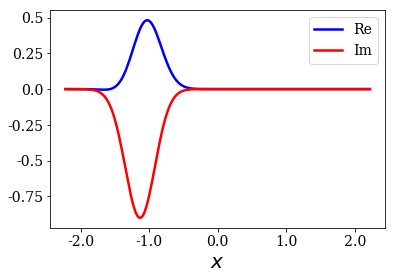

In [3]:
sigma = l/20. # width of the Gaussian
x_c   = -l/4. # center of the Gaussian
k_0   = 1.    # initial momentum
gauss = Gaussian(sigma, x_c, k0=k_0, grid=xgrid)
gauss.plot()

### Make sure that both basis sets are complete for this test function

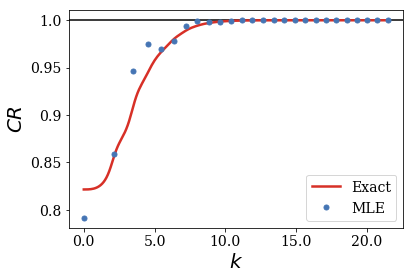

In [4]:
siegerts.plot_completeness_convergence(gauss)

Using the continuum states up to $k = 20$ is enough for the basis set to be considered as complete. In comparison, using only 25 resonant couples (plus the bound and anti-bound states) leads to the same result.

### Exact and exact Siegert expansion of the time propagation of a Gaussian wavepacket

The propagation of the wavepacket is evaluated for the times in `time_grid`, using the same protocol as in the previous notebook:

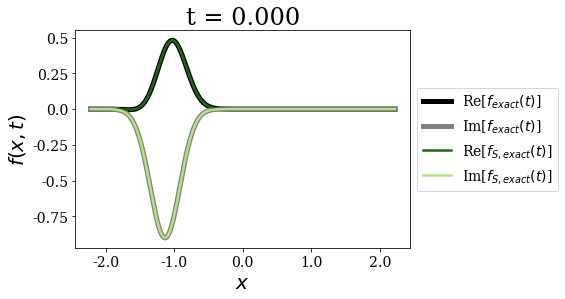

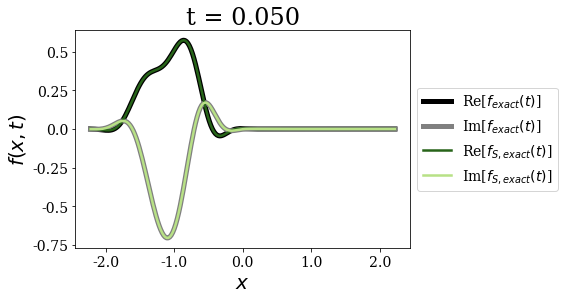

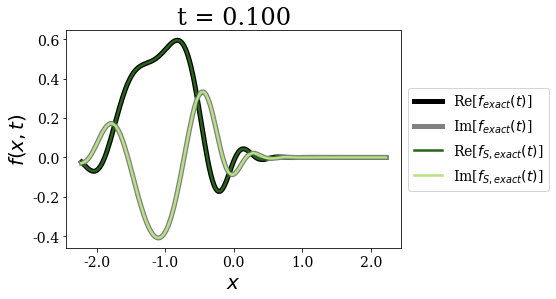

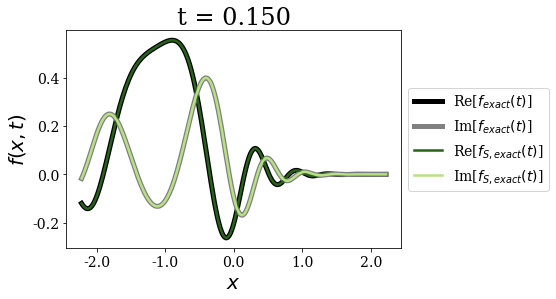

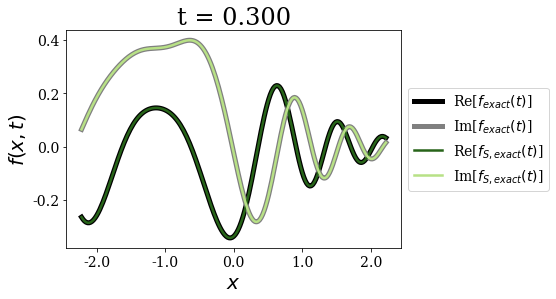

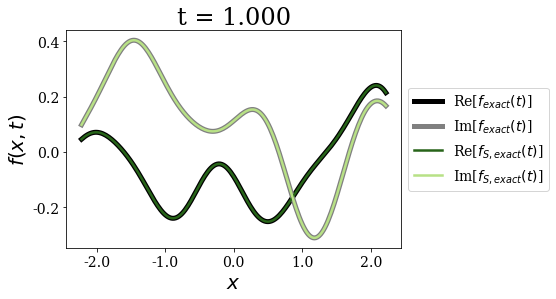

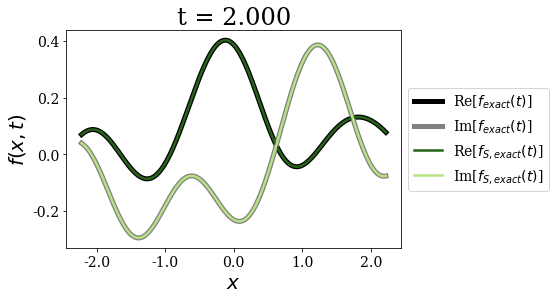

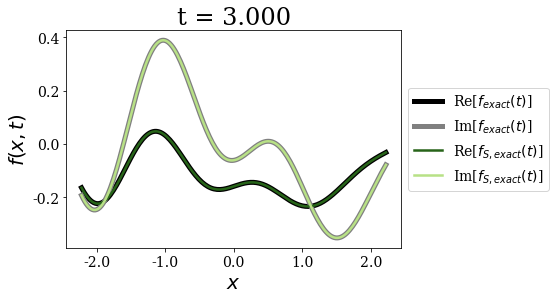

In [5]:
# Definition of the time grid
time_grid = [0.0, 0.05, 0.1, 0.15, 0.3, 1.0, 2.0, 3.0]
# Plot the time propagation of both exact expansions
siegerts.plot_propagation(gauss, time_grid)

Again, for any time - and as expected - both exact expansions give the same time propagation of the initial wavepacket. The non-zero initial momentum does not influence that fact.

## Case 2: larger initial momentum

The case of a large initial momentum exhibits the overcompleteness of the Siegert states basis set: we will show that using different Siegert states expansion may lead to very similar and (almost) correct time propagation under certain conditions.

To that end, the four types of expansions presented in the previous notebook will be used: 

* the exact time propagation using the bound and continuum states (used as the reference),

* the Mittag-Leffler expansion (weight $\alpha_S = 1/2$ for all Siegert states),

* the Berggren expansion (weight $\alpha_S = 1$ for bound and resonant states, 0 for the others).

* the exact Siegert expansion, using the time and state-dependent weights $\alpha_S$ from Eq. 69 of [Santra et al., *PRA* **71** (2005)](http://link.aps.org/doi/10.1103/PhysRevA.71.032703),

We will see that the Berggren expansion, being rather accurate to reproduce such an initial wavepacket, keeps the same accuracy at any time, while the Mittag-Leffler is still accurate in the short time limit only. We will still conclude that the best agreement with the reference time propagation is obtained by the exact Siegert expansion.

### New initial wavepacket

The same Gaussian is used, save its initial momentum, that is larger.

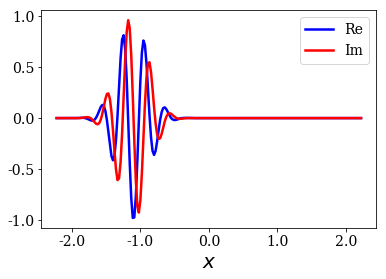

In [6]:
k_0 = 20. # initial momentum
gauss = Gaussian(sigma, x_c, k0=k_0, grid=xgrid)
gauss.plot()

### Make sure that both basis sets are complete for this test function

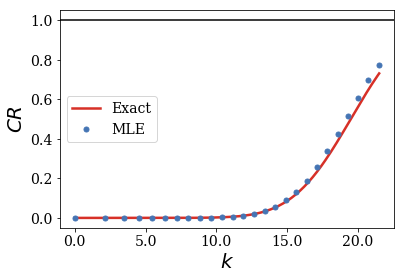

In [7]:
siegerts.plot_completeness_convergence(gauss)

When compared to the same Gaussian with small or no initial momentum, the convergence of the completeness relation is very different. **The basis sets previously defined are no longer complete for this initial state.** 

As you can see, the bound and anti-bound states contributions to the completeness relations are negligible. The same is true for the continuum or resonant states to the completeness relation below $k=10$. **More continuum and Siegert states have to be included in both basis sets!**

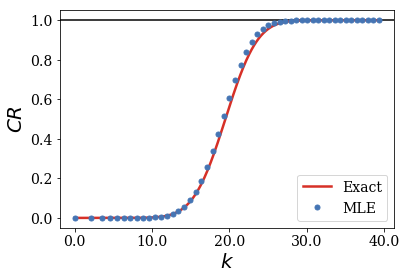

In [8]:
# Extend the Siegert states basis set
siegerts = SWPBasisSet.from_file(filename, grid=xgrid, nres=50)

# Test the exact and MLE of the completeness relation for the new basis sets
siegerts.plot_completeness_convergence(gauss)

The continuum states (or resonant couples) whose wavenumbers (or absolute value of the wavenumbers) lie in the 10 to 30 range (*e.g.*, centered on the initial momentum) are the most important to reproduce the initial wavepacket. All other continuum or Siegert states have negligible influence on the completeness relation.

### Time propagation of the Gaussian wavepacket

#### Exact vs MLE

As expected, the Mittag-Leffler expansion (MLE) still diverges for long times, this is why it is not be plotted after certain time, though it is correct for $t=0$ and rather good for very short times, while the wavepacket does not reach the border of region $II$:

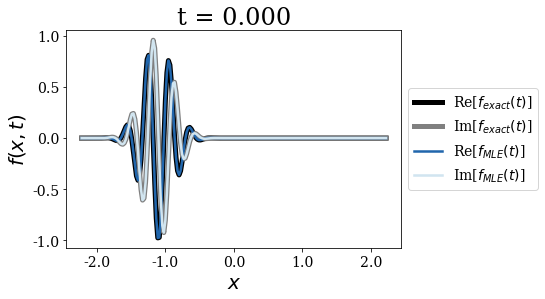

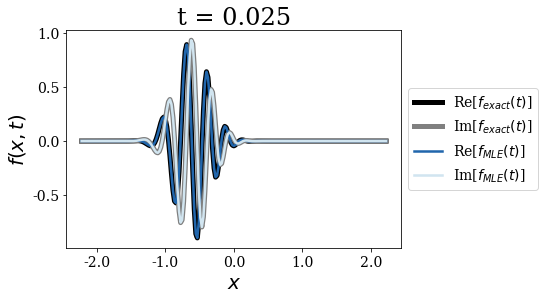

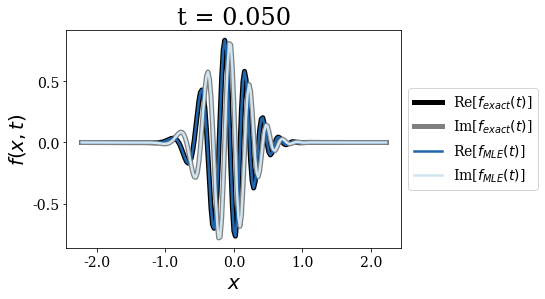

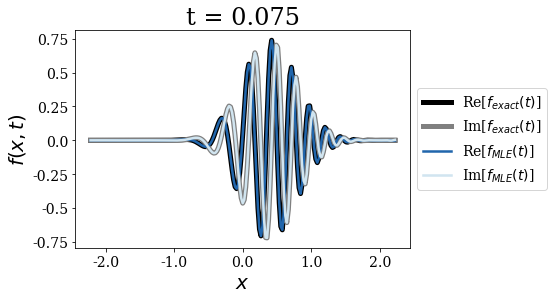

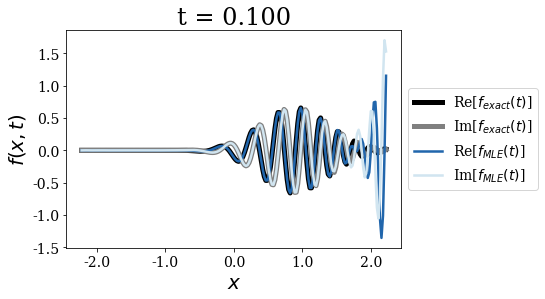

In [9]:
time_grid_MLE = np.linspace(0, 0.1, 5)
siegerts.plot_propagation(gauss, time_grid_MLE, exact_Siegert=False, MLE=True)

#### Exact vs Berggren expansion

We use a longer time_grid, because the Berggren expansion does not diverge as time increases (contrary to the MLE):

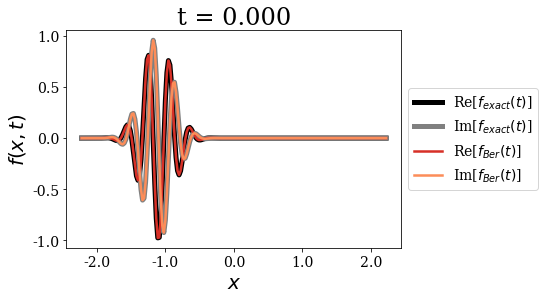

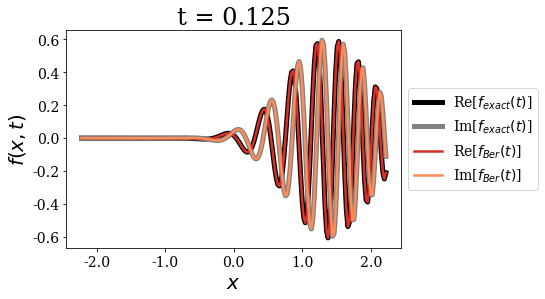

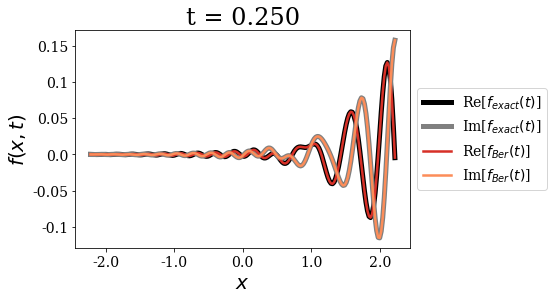

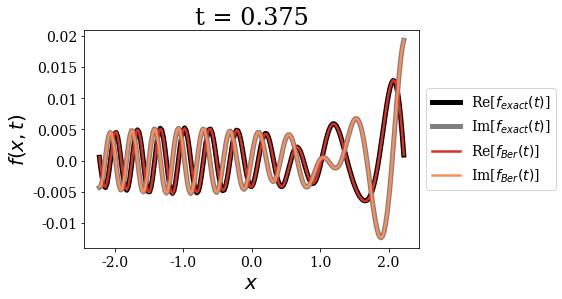

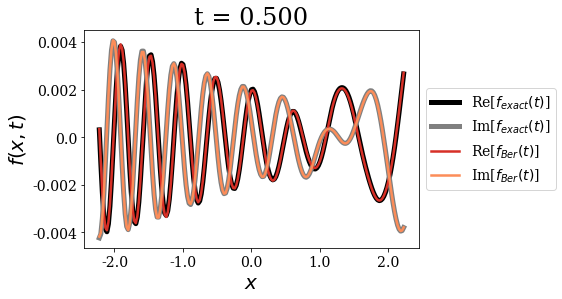

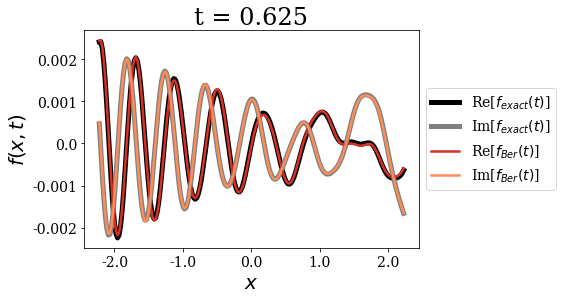

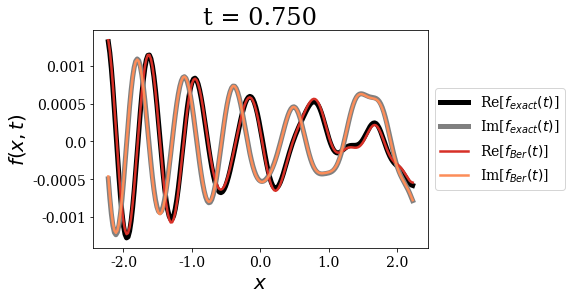

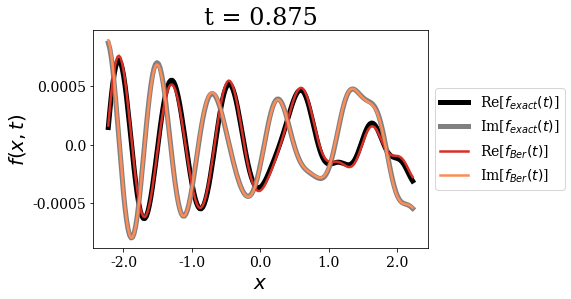

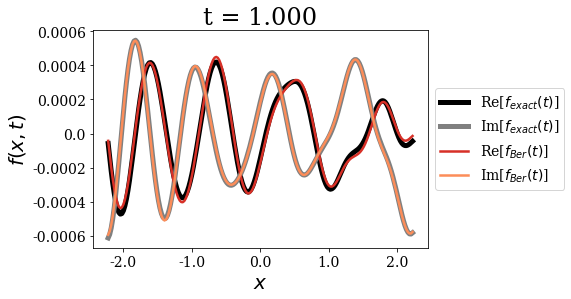

In [10]:
time_grid = np.linspace(0, 1, 9)
siegerts.plot_propagation(gauss, time_grid, exact_Siegert=False, Berggren=True)

The first important point concerning the Berggren expansion is that it seems very accurate to express the initial wavepacket for $t=0$. It is as if there were *more than one correct Siegert states expansion* for such a test function. This fact actually points to the **overcompleteness** of the Siegert states basis set, a point that has been extensively discussed in the literature. The Berggren expansion still keeps a very good accuracy for all times, but it actually shows some very small deviations in the long time limit.

Also note that the momentum of the initial wavepacket is large enough for the propagation to be almost reflection-free at the border of region $II$: the wavepacket is almost entirely transmitted out of region $II$. This is why the amplitude of the y-axis is not constrained to a defined range after a certain time.

#### Exact and exact Siegert states expansion

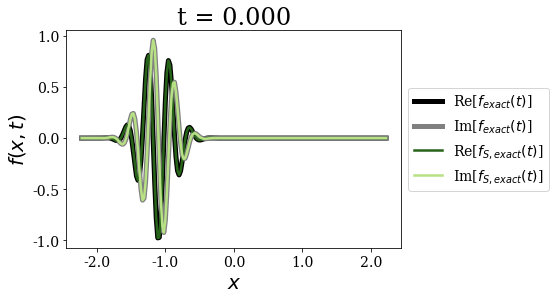

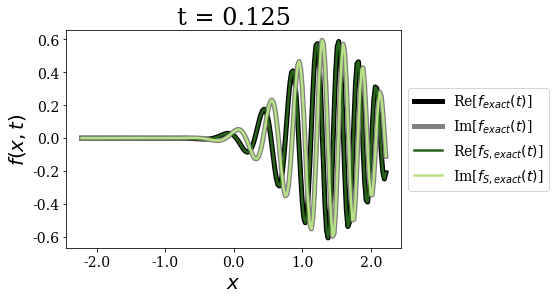

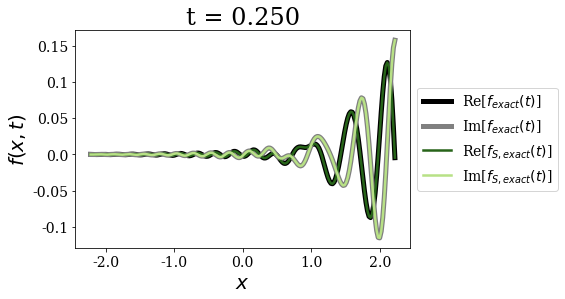

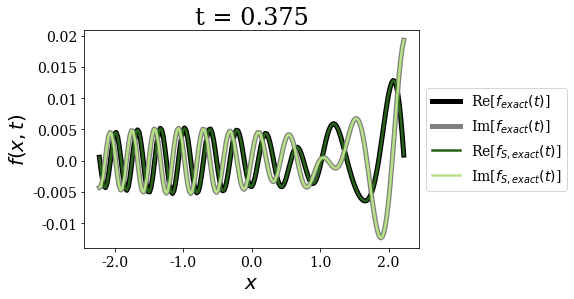

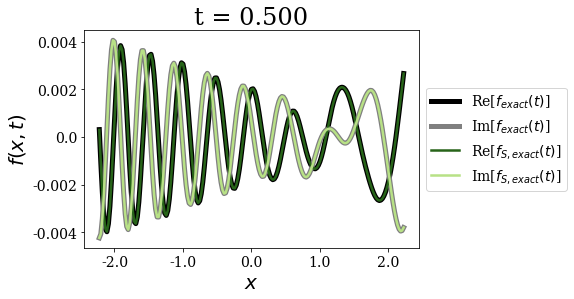

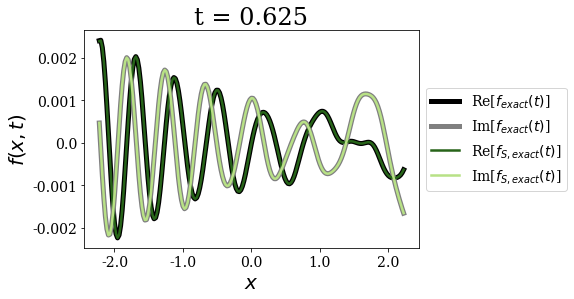

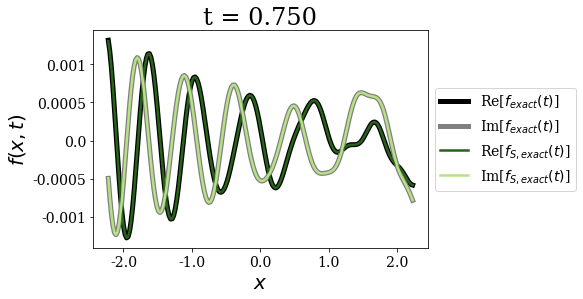

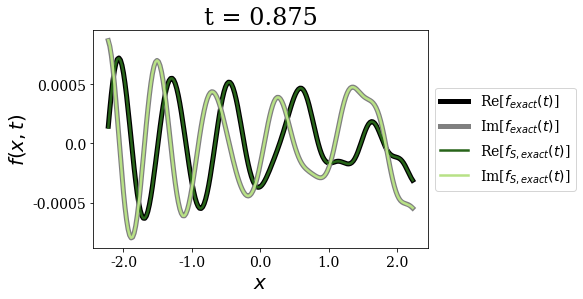

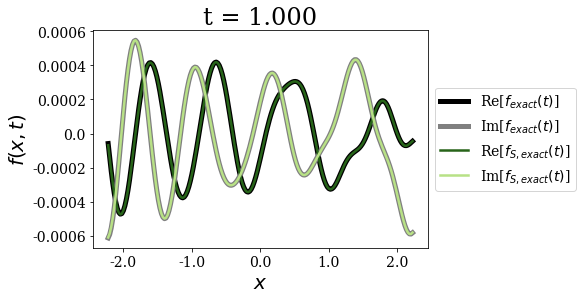

In [11]:
siegerts.plot_propagation(gauss, time_grid)

The exact Siegert states expansion uses time and state-dependent weights for the time-propagation of a wavepacket (where the limit for $t=0$ is nothing but the Mittag-Leffler expansion). It gives excellent agreement with the exact result for all times, even for the larger times, contrary to the Berggren expansion.

## Conclusion

The momentum of the initial state does not modify the conclusions presented in the previous notebooks: the Siegert state expansion presented in [Santra et al., *PRA* **71** (2005)](http://link.aps.org/doi/10.1103/PhysRevA.71.032703) gives the best agreement with the reference result, whatever the test function, whatever the time (long or short time).

We also presented a case where the *overcompleteness* of the Siegert states basis set is clearly seen: when the initial momentum is large, the Berggren expansion gives a very good agreement with the exact result.